<a href="https://colab.research.google.com/github/Rakib-hosen/cat-vs-dog-using-cnn/blob/master/catsvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# বিড়াল ও কুকুর এর ছবি ডাউনলোড

!wget --no-check-certificate \
  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
  -O /tmp/cats_and_dogs.zip

--2020-08-07 05:59:59--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.74.54.169, 2600:1409:a:79d::e59, 2600:1409:a:781::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.74.54.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats_and_dogs.zip’

/tmp/cats_and_dogs. 100%[===================>] 786.68M  25.8MB/s    in 23s     

2020-08-07 06:00:23 (33.5 MB/s) - ‘/tmp/cats_and_dogs.zip’ saved [824894548/824894548]



In [ ]:
#ডাউনলোড করা জিপ ফাইল এক্সট্র্যাক্ট করা

import os
import zipfile

local_zip  = '/tmp/cats_and_dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
# ২৫০০০ ছবি ডাউনলোড চেক করা

print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [ ]:
#ট্রেন এবং টেস্ট ফাইল গুলো ভাগ করা

import random
from shutil import copyfile

base_dir = '/tmp/PetImages/'
cat_source_dir = '/tmp/PetImages/Cat/'
dog_source_dir = '/tmp/PetImages/Dog/'
training_dir = '/tmp/cats_and_dogs/training/'
training_cats_dir = '/tmp/cats_and_dogs/training/cats/'
training_dogs_dir = '/tmp/cats_and_dogs/training/dogs/'
validation_dir = '/tmp/cats_and_dogs/validation/'
validation_cats_dir = '/tmp/cats_and_dogs/validation/cats/'
validation_dogs_dir = '/tmp/cats_and_dogs/validation/dogs/'

def train_test_split(source_dir, train_destination_dir, validation_destination_dir, split_ratio=0.9):
  data = []
  imgs = os.listdir(source_dir)
  
  for img in imgs:
    if os.path.getsize(os.path.join(source_dir,img))>0:
      data.append(img)
    else:
      print(f'this ({img}) img size is zero . So it will not be included')

  data = random.sample(data, len(data))
  train_size = int(len(data)*split_ratio)
  train_data = data[:train_size]
  validation_data = data[train_size:]

  os.makedirs(train_destination_dir,exist_ok=True)
  os.makedirs(validation_destination_dir,exist_ok=True)

  for img in train_data:
    copyfile(os.path.join(source_dir,img),os.path.join(train_destination_dir,img))
  for img in validation_data:
    copyfile(os.path.join(source_dir,img),os.path.join(validation_destination_dir,img))

train_test_split(cat_source_dir,training_cats_dir,validation_cats_dir,0.9)
train_test_split(dog_source_dir,training_dogs_dir,validation_dogs_dir,0.9)

print(f'cats training img ={len(os.listdir(training_cats_dir))}, validation img = {len(os.listdir(validation_cats_dir))}')
print(f'dogs training img ={len(os.listdir(training_dogs_dir))}, validation img = {len(os.listdir(validation_dogs_dir))}')

this (666.jpg) img size is zero . So it will not be included
this (11702.jpg) img size is zero . So it will not be included
cats training img =11250, validation img = 1250
dogs training img =11250, validation img = 1250


In [ ]:
#ট্রেন এবং টেস্ট ফাইল গুলো চেক করা

train_cats_fnames = os.listdir(training_cats_dir)
train_dogs_fnames = os.listdir(training_dogs_dir)

validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

print(validation_cats_fnames[:10])
print(validation_dogs_fnames[:10])

['6917.jpg', '11943.jpg', '1555.jpg', '5904.jpg', '5646.jpg', '6088.jpg', '188.jpg', '6519.jpg', '4293.jpg', '10219.jpg']
['6917.jpg', '11943.jpg', '1555.jpg', '5904.jpg', '5646.jpg', '188.jpg', '6519.jpg', '4293.jpg', '10219.jpg', '3520.jpg']
['12138.jpg', '4614.jpg', '10909.jpg', '11810.jpg', '9218.jpg', '6301.jpg', '2141.jpg', '11620.jpg', '110.jpg', '11601.jpg']
['6088.jpg', '3947.jpg', '9681.jpg', '8870.jpg', '12474.jpg', '11620.jpg', '371.jpg', '8709.jpg', '5420.jpg', '5882.jpg']


In [ ]:
%matplotlib inline
# ট্রেন ডিরেক্টরিতে বিড়াল এবং কুকুর এর ফাইলগুলো ঠিক আছে কিনা চেক করা 

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+= 8

next_cat_pix = [os.path.join(training_cats_dir,fname)
                for fname in train_cats_fnames[ pic_index-8:pic_index]]
next_dog_pix = [os.path.join(training_dogs_dir,fname)
                for fname in train_dogs_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
# মডেল বানানো 

model = tf.keras.Sequential([
                          tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2, 2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(512, activation='relu'),
                          tf.keras.layers.Dense(1, activation='sigmoid'),

])

In [ ]:
# মডেল চেক করা 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
# মডেল কমপাইল করা. অপটিমাইজার , লস ফাঙ্কশন ঠিক করা 

model.compile(optimizer='adam',
              loss = tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ইমেজ অগমেন্টেশন

train_gen = ImageDataGenerator(rescale=1.0/255.0,
                               rotation_range = 40,
                               height_shift_range = 0.2,
                               width_shift_range = 0.2,
                               horizontal_flip = True,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               fill_mode = 'nearest')
validation_gen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_gen.flow_from_directory(
    training_dir,
    batch_size = 64,
    class_mode = 'binary',
    target_size = (150,150)
)

validation_generator = validation_gen.flow_from_directory(
    validation_dir,
    batch_size = 64,
    class_mode = 'binary',
    target_size = (150, 150)
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epochs_end(self, epochs, logs={}):
    if(logs.get('accuracy')>0.95):
      model.stop_training = True

callback = mycallback()

In [ ]:
#মডেল ট্রেন করা 

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 10,
    verbose =2,
    callbacks = [callback]
)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

352/352 - 173s - loss: 0.4822 - accuracy: 0.7713 - val_loss: 0.3939 - val_accuracy: 0.8188
Epoch 2/10
352/352 - 166s - loss: 0.4561 - accuracy: 0.7878 - val_loss: 0.4104 - val_accuracy: 0.8152
Epoch 3/10
352/352 - 165s - loss: 0.4439 - accuracy: 0.7952 - val_loss: 0.3764 - val_accuracy: 0.8356
Epoch 4/10
352/352 - 167s - loss: 0.4353 - accuracy: 0.8022 - val_loss: 0.4089 - val_accuracy: 0.8140
Epoch 5/10
352/352 - 167s - loss: 0.4118 - accuracy: 0.8126 - val_loss: 0.3545 - val_accuracy: 0.8484
Epoch 6/10
352/352 - 165s - loss: 0.3992 - accuracy: 0.8183 - val_loss: 0.3573 - val_accuracy: 0.8472
Epoch 7/10
352/352 - 166s - loss: 0.3838 - accuracy: 0.8251 - val_loss: 0.3594 - val_accuracy: 0.8428
Epoch 8/10
352/352 - 165s - loss: 0.3767 - accuracy: 0.8326 - val_loss: 0.3162 - val_accuracy: 0.8580
Epoch 9/10
352/352 - 165s - loss: 0.3667 - accuracy: 0.8359 - val_loss: 0.2807 - val_accuracy: 0.8696
Epoch 10/10
352/352 - 165s - loss: 0.3522 - accuracy: 0.8471 - val_loss: 0.3011 - val_accurac

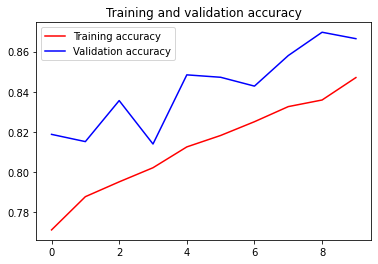

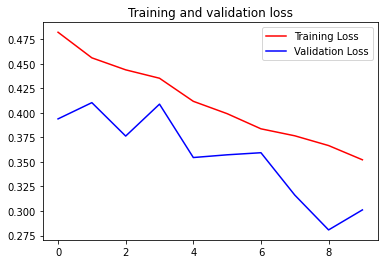

In [ ]:
# একুরেসি এবং ভ্যালিডেশন একুরেসি , লস এবং ভ্যালিডেশন লস প্লট করা 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# নিজের ইমেজ দিয়ে চেক করা

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/'+ fn
  img = image.load_img(path, target_size=(150, 150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + ' is a dog')
  else:
    print(fn + ' is a cat')



Saving dog-puppy-on-garden-royalty-free-image-1586966191.jpg to dog-puppy-on-garden-royalty-free-image-1586966191 (1).jpg
Saving download.jpg to download (2).jpg
Saving images.jpg to images (2).jpg
Saving Layer-1704-1920x840.jpg to Layer-1704-1920x840 (2).jpg
[1.]
dog-puppy-on-garden-royalty-free-image-1586966191.jpg is a dog
[0.9775349]
download.jpg is a dog
[1.]
images.jpg is a dog
[1.7443407e-24]
Layer-1704-1920x840.jpg is a dog
